In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv('E:/data/data science/data course/DATASET/spine.csv')

In [3]:
df.shape

(310, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PI          310 non-null    float64
 1   PT          310 non-null    float64
 2   LL          310 non-null    float64
 3   SS          310 non-null    float64
 4   PR          310 non-null    float64
 5   GS          310 non-null    float64
 6   Categories  310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
df.describe()

,PI,PT,LL,SS,PR,GS
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [6]:
df.head()

,PI,PT,LL,SS,PR,GS,Categories
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [7]:
df.tail()

,PI,PT,LL,SS,PR,GS,Categories
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [8]:
df.mean()

PI     60.496653
PT     17.542822
LL     51.930930
SS     42.953831
PR    117.920655
GS     26.296694
dtype: float64

In [9]:
df.max()

PI                      129.834
PT                      49.4319
LL                      125.742
SS                       121.43
PR                      163.071
GS                      418.543
Categories    Spondylolisthesis
dtype: object

In [10]:
df.min()

PI            26.1479
PT           -6.55495
LL                 14
SS            13.3669
PR            70.0826
GS           -11.0582
Categories     Hernia
dtype: object

In [17]:
df.agg({'PI': ['mean', 'std'], 'GS': ['mean', 'median']})

,PI,GS
mean,60.496653,26.296694
median,NaN,11.767934
std,17.236520,NaN


In [12]:
np.sum(df.isnull())

PI            0
PT            0
LL            0
SS            0
PR            0
GS            0
Categories    0
dtype: int64

In [25]:
df.isna().unstack()

PI          0      False
            1      False
            2      False
            3      False
            4      False
                   ...  
Categories  305    False
            306    False
            307    False
            308    False
            309    False
Length: 2170, dtype: bool

It seems that GS variable is scaled differently from the rest of variables. From the mean and median, we can tell that PI and GS are skewed. There are three categories with Spondylolisthesis as the most frequent one.
Fortunately, there are no missing values in the data since sum(df.isna().unstack())= 0

In [26]:
df.groupby('Categories').agg('mean')

,PI,PT,LL,SS,PR,GS
Categories,,,,,,
Hernia,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
Normal,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
Spondylolisthesis,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


In [27]:
df.groupby('Categories').agg('std')

,PI,PT,LL,SS,PR,GS
Categories,,,,,,
Hernia,10.697131,7.016708,9.767795,7.555388,9.355720,5.531177
Normal,12.368161,6.778503,12.361388,9.624004,9.014246,6.307483
Spondylolisthesis,15.109337,11.506169,16.397068,12.318813,15.579995,40.108030


It is noticeable that for all variables except PR, the mean and 
standard deviation for Spondylolisthesis patients are higher than 
those for other categories. For patients with Hernia, 
most of variables tend to take smaller values.


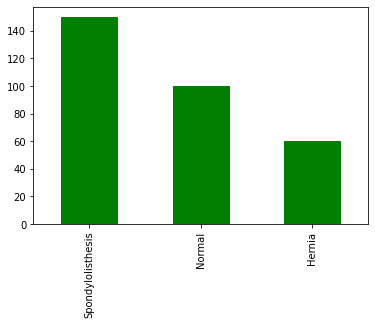

In [19]:
df['Categories'].value_counts().plot.bar(facecolor='g',edgecolor="g");


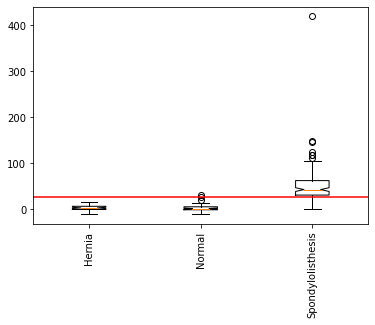

In [33]:
l = []
for x in np.unique(df['Categories']):
  l.append(df['GS'].loc[df['Categories'] == x])
 
plt.boxplot(l, notch=True)
plt.xticks(np.arange(1, 4), np.unique(df['Categories']), rotation=90)  # Add and rotate the text
plt.axhline(np.mean(df['GS']), color='red');

The variable GS is an appropriate variable to separate Spondylolisthesis from the rest of categories. The higher average and larger standard deviation are obvious. An extreme value on this variable is also observable around 400.

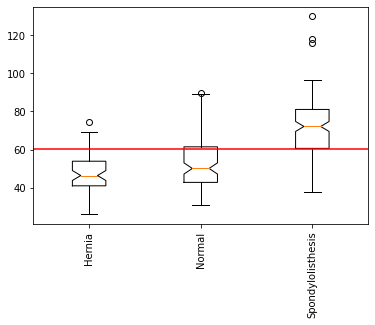

In [39]:
l = []
for x in np.unique(df['Categories']):
  l.append(df['PI'].loc[df['Categories'] == x])
 
plt.boxplot(l, notch=True)
plt.xticks(np.arange(1, 4), np.unique(df['Categories']), rotation=90)  # Add and rotate the text
plt.axhline(np.mean(df['PI']), color='red');

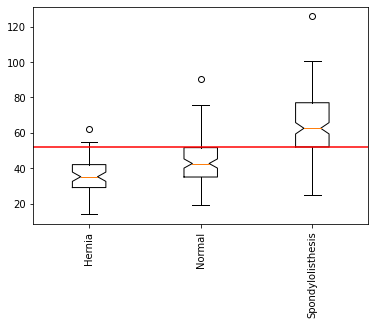

In [37]:
l = []
for x in np.unique(df['Categories']):
  l.append(df['LL'].loc[df['Categories'] == x])
 
plt.boxplot(l, notch=True)
plt.xticks(np.arange(1, 4), np.unique(df['Categories']), rotation=90)  # Add and rotate the text
plt.axhline(np.mean(df['LL']), color='red');

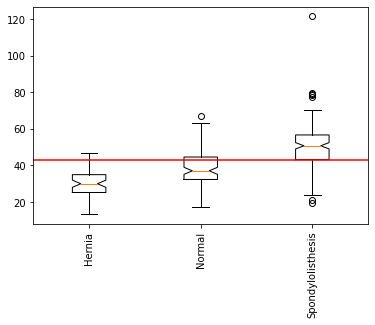

In [38]:
l = []
for x in np.unique(df['Categories']):
  l.append(df['SS'].loc[df['Categories'] == x])
 
plt.boxplot(l, notch=True)
plt.xticks(np.arange(1, 4), np.unique(df['Categories']), rotation=90)  # Add and rotate the text
plt.axhline(np.mean(df['SS']), color='red');

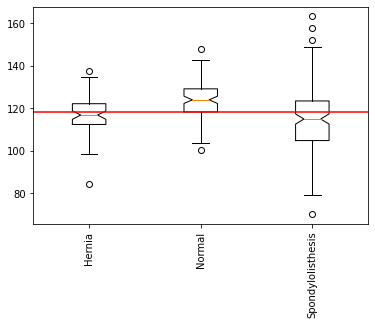

In [41]:
l = []
for x in np.unique(df['Categories']):
  l.append(df['PR'].loc[df['Categories'] == x])
 
plt.boxplot(l, notch=True)
plt.xticks(np.arange(1, 4), np.unique(df['Categories']), rotation=90)  # Add and rotate the text
plt.axhline(np.mean(df['PR']), color='red');

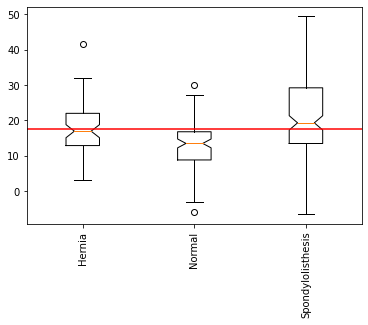

In [42]:
l = []
for x in np.unique(df['Categories']):
  l.append(df['PT'].loc[df['Categories'] == x])
 
plt.boxplot(l, notch=True)
plt.xticks(np.arange(1, 4), np.unique(df['Categories']), rotation=90)  # Add and rotate the text
plt.axhline(np.mean(df['PT']), color='red');